In [1]:
import pandas as pd
import numpy as np

# 1. 数据预处理

In [2]:
data = pd.read_excel("./拓展思考样本数据.xls", index_col='纳税人编号')

In [3]:
data

,销售类型,销售模式,汽车销售平均毛利,维修毛利,企业维修收入占销售收入比重,增值税税负,存货周转率,成本费用利润率,整体理论税负,整体税负控制数,办牌率,单台办牌手续费收入,代办保险率,保费返还率,输出
纳税人编号,,,,,,,,,,,,,,,
1,国产轿车,4S店,0.0635,0.3241,0.0879,0.0084,8.5241,0.0018,0.0166,0.0147,0.4000,0.02,0.7155,0.1500,正常
2,国产轿车,4S店,0.0520,0.2577,0.1394,0.0298,5.2782,-0.0013,0.0032,0.0137,0.3307,0.02,0.2697,0.1367,正常
3,国产轿车,4S店,0.0173,0.1965,0.1025,0.0067,19.8356,0.0014,0.0080,0.0061,0.2256,0.02,0.2445,0.1301,正常
4,国产轿车,一级代理商,0.0501,0.0000,0.0000,0.0000,1.0673,-0.3596,-0.1673,0.0000,0.0000,0.00,0.0000,0.0000,异常
5,进口轿车,4S店,0.0564,0.0034,0.0066,0.0017,12.8470,-0.0014,0.0123,0.0095,0.0039,0.08,0.0117,0.1872,正常
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,国产轿车,4S店,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,异常
121,卡车及轻卡,一级代理商,0.0196,0.0000,0.0000,0.0015,0.0000,0.0020,0.0176,0.0000,0.0000,0.00,0.0000,0.0000,异常
122,卡车及轻卡,其它,0.0000,0.0000,0.0000,0.0000,6.1714,0.0000,0.0303,0.0000,0.0000,0.00,0.0000,0.0000,异常


## 1.1 销售模式预处理

In [4]:
car_types = np.unique(np.array(data['销售类型'])).astype('str')

In [5]:
car_types_dict = dict(zip(car_types, range(len(car_types))))

In [6]:
car_types_dict

{'其它': 0,
 '卡车及轻卡': 1,
 '商用货车': 2,
 '国产轿车': 3,
 '大客车': 4,
 '工程车': 5,
 '微型面包车': 6,
 '进口轿车': 7}

In [7]:
for car_type in car_types_dict:
    car_type_bool_series = data['销售类型'] == car_type
#     print(car_type_bool_series)
    car_type_int_val = car_types_dict.get(car_type)
#     print(car_type_int_val)
    data['销售类型'][car_type_bool_series] = car_type_int_val


d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 1.2 销售类型预处理

In [8]:
# s = data['销售类型'] == '国产轿车'
# data['销售类型'][s]

In [9]:
data

,销售类型,销售模式,汽车销售平均毛利,维修毛利,企业维修收入占销售收入比重,增值税税负,存货周转率,成本费用利润率,整体理论税负,整体税负控制数,办牌率,单台办牌手续费收入,代办保险率,保费返还率,输出
纳税人编号,,,,,,,,,,,,,,,
1,3,4S店,0.0635,0.3241,0.0879,0.0084,8.5241,0.0018,0.0166,0.0147,0.4000,0.02,0.7155,0.1500,正常
2,3,4S店,0.0520,0.2577,0.1394,0.0298,5.2782,-0.0013,0.0032,0.0137,0.3307,0.02,0.2697,0.1367,正常
3,3,4S店,0.0173,0.1965,0.1025,0.0067,19.8356,0.0014,0.0080,0.0061,0.2256,0.02,0.2445,0.1301,正常
4,3,一级代理商,0.0501,0.0000,0.0000,0.0000,1.0673,-0.3596,-0.1673,0.0000,0.0000,0.00,0.0000,0.0000,异常
5,7,4S店,0.0564,0.0034,0.0066,0.0017,12.8470,-0.0014,0.0123,0.0095,0.0039,0.08,0.0117,0.1872,正常
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3,4S店,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,异常
121,1,一级代理商,0.0196,0.0000,0.0000,0.0015,0.0000,0.0020,0.0176,0.0000,0.0000,0.00,0.0000,0.0000,异常
122,1,其它,0.0000,0.0000,0.0000,0.0000,6.1714,0.0000,0.0303,0.0000,0.0000,0.00,0.0000,0.0000,异常


In [10]:
sales_modes = np.unique(np.array(data['销售模式'])).astype(str)

In [11]:
sales_modes

array(['4S店', '一级代理商', '二级及二级以下代理商', '其它', '多品牌经营店'], dtype='<U10')

In [12]:
sales_mode_dict = dict(zip(sales_modes, range(len(sales_modes))))

In [13]:
sales_mode_dict

{'4S店': 0, '一级代理商': 1, '二级及二级以下代理商': 2, '其它': 3, '多品牌经营店': 4}

In [14]:
for sales_mode in sales_mode_dict:
    this_sales_mode_bool_series = data['销售模式'] == sales_mode
    this_sales_mode_int_val = sales_mode_dict.get(sales_mode)
    data['销售模式'][this_sales_mode_bool_series] = this_sales_mode_int_val

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
data

,销售类型,销售模式,汽车销售平均毛利,维修毛利,企业维修收入占销售收入比重,增值税税负,存货周转率,成本费用利润率,整体理论税负,整体税负控制数,办牌率,单台办牌手续费收入,代办保险率,保费返还率,输出
纳税人编号,,,,,,,,,,,,,,,
1,3,0,0.0635,0.3241,0.0879,0.0084,8.5241,0.0018,0.0166,0.0147,0.4000,0.02,0.7155,0.1500,正常
2,3,0,0.0520,0.2577,0.1394,0.0298,5.2782,-0.0013,0.0032,0.0137,0.3307,0.02,0.2697,0.1367,正常
3,3,0,0.0173,0.1965,0.1025,0.0067,19.8356,0.0014,0.0080,0.0061,0.2256,0.02,0.2445,0.1301,正常
4,3,1,0.0501,0.0000,0.0000,0.0000,1.0673,-0.3596,-0.1673,0.0000,0.0000,0.00,0.0000,0.0000,异常
5,7,0,0.0564,0.0034,0.0066,0.0017,12.8470,-0.0014,0.0123,0.0095,0.0039,0.08,0.0117,0.1872,正常
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,异常
121,1,1,0.0196,0.0000,0.0000,0.0015,0.0000,0.0020,0.0176,0.0000,0.0000,0.00,0.0000,0.0000,异常
122,1,3,0.0000,0.0000,0.0000,0.0000,6.1714,0.0000,0.0303,0.0000,0.0000,0.00,0.0000,0.0000,异常


## 1.3 标签值预处理

In [16]:
data['输出'][data['输出'] == '正常'] = 0
data['输出'][data['输出'] == '异常'] = 1

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
data

,销售类型,销售模式,汽车销售平均毛利,维修毛利,企业维修收入占销售收入比重,增值税税负,存货周转率,成本费用利润率,整体理论税负,整体税负控制数,办牌率,单台办牌手续费收入,代办保险率,保费返还率,输出
纳税人编号,,,,,,,,,,,,,,,
1,3,0,0.0635,0.3241,0.0879,0.0084,8.5241,0.0018,0.0166,0.0147,0.4000,0.02,0.7155,0.1500,0
2,3,0,0.0520,0.2577,0.1394,0.0298,5.2782,-0.0013,0.0032,0.0137,0.3307,0.02,0.2697,0.1367,0
3,3,0,0.0173,0.1965,0.1025,0.0067,19.8356,0.0014,0.0080,0.0061,0.2256,0.02,0.2445,0.1301,0
4,3,1,0.0501,0.0000,0.0000,0.0000,1.0673,-0.3596,-0.1673,0.0000,0.0000,0.00,0.0000,0.0000,1
5,7,0,0.0564,0.0034,0.0066,0.0017,12.8470,-0.0014,0.0123,0.0095,0.0039,0.08,0.0117,0.1872,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,1
121,1,1,0.0196,0.0000,0.0000,0.0015,0.0000,0.0020,0.0176,0.0000,0.0000,0.00,0.0000,0.0000,1
122,1,3,0.0000,0.0000,0.0000,0.0000,6.1714,0.0000,0.0303,0.0000,0.0000,0.00,0.0000,0.0000,1


In [18]:
data.to_excel("./processed_data.xlsx")

# 2. 划分训练集和测试集

In [19]:
from random import shuffle

In [20]:
data = data.values

In [21]:
shuffle(data)

In [22]:
p = .8

In [23]:
train_num = int(p * len(data))

In [24]:
Xtrain = data[:train_num, :-1].astype(float)
Ytrain = data[:train_num, -1].astype(int)

In [25]:
Xtest = data[train_num:, :-1].astype(float)
Ytest = data[train_num:, -1].astype(int)

# 3. 使用决策树模型进行训练、预测

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
tree = DecisionTreeClassifier()

In [28]:
tree.fit(Xtrain, Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 3.1 绘制混淆矩阵

In [53]:
import sys
sys.path.append("..")
del cm_plot
from demo.code.cm_plot import cm_plot

In [54]:
Xtrain

array([[3.    , 0.    , 0.0635, ..., 0.02  , 0.7155, 0.15  ],
       [3.    , 0.    , 0.0635, ..., 0.02  , 0.7155, 0.15  ],
       [3.    , 0.    , 0.0635, ..., 0.02  , 0.7155, 0.15  ],
       ...,
       [3.    , 0.    , 0.0495, ..., 0.    , 0.    , 0.    ],
       [3.    , 3.    , 0.006 , ..., 0.    , 0.    , 0.    ],
       [4.    , 1.    , 0.0115, ..., 0.    , 0.    , 0.    ]])

In [55]:
train_pred = tree.predict(Xtrain)
test_pred = tree.predict(Xtest)

<module 'matplotlib.pyplot' from 'd:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

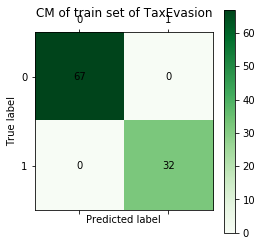

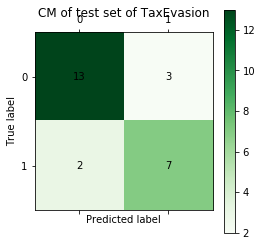

In [58]:
cm_plot(Ytrain, train_pred, 'CM of train set of TaxEvasion')
cm_plot(Ytest, test_pred, 'CM of test set of TaxEvasion')

# 4. 构建神经网络模型进行预测

In [59]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation

## 4.1 模型构建

In [68]:
feature_num = len(Xtrain[0])
hidden_units = int(1.5 * feature_num)

In [73]:
net = Sequential()
net.add(Dense(input_dim=feature_num, units=hidden_units))
net.add(Activation('relu'))
net.add(Dense(units=1))
net.add(Activation('sigmoid'))

net.compile(loss="binary_crossentropy", 
            optimizer='adam', 
#             class_mode='binary'# 新版本无此参数，训练会报错
           )

## 4.2 模型训练

In [77]:
net.fit(Xtrain, Ytrain, epochs=100, batch_size=10)

Epoch 1/100
99/99 [==============================] - 0s 171us/step - loss: 2.3307e-09
Epoch 2/100
99/99 [==============================] - 0s 161us/step - loss: 2.3398e-09
Epoch 3/100
99/99 [==============================] - 0s 191us/step - loss: 2.3472e-09
Epoch 4/100
99/99 [==============================] - 0s 161us/step - loss: 2.3543e-09
Epoch 5/100
99/99 [==============================] - 0s 302us/step - loss: 2.3589e-09
Epoch 6/100
99/99 [==============================] - 0s 186us/step - loss: 2.3440e-09
Epoch 7/100
99/99 [==============================] - 0s 161us/step - loss: 2.3452e-09
Epoch 8/100
99/99 [==============================] - 0s 151us/step - loss: 2.3489e-09
Epoch 9/100
99/99 [==============================] - 0s 161us/step - loss: 2.3495e-09
Epoch 10/100
99/99 [==============================] - 0s 171us/step - loss: 2.3557e-09
Epoch 11/100
99/99 [==============================] - 0s 191us/step - loss: 2.3337e-09
Epoch 12/100
99/99 [==============================] 

## 4.3 模型预测

In [81]:
train_pred_result = net.predict_classes(Xtrain)
test_pred_result = net.predict_classes(Xtest)
test_pred_prob = net.predict_proba(Xtest)

## 4.4 绘制混淆矩阵

<module 'matplotlib.pyplot' from 'd:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

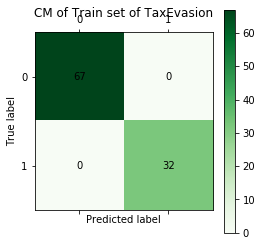

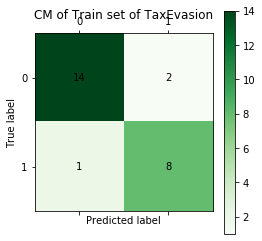

In [85]:
cm_plot(Ytrain, train_pred_result, 'CM of Train set of TaxEvasion')
cm_plot(Ytest, test_pred_result, 'CM of Train set of TaxEvasion')

# 5. ROC 曲线绘制

In [107]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

## 5.1 数据准备

In [108]:
dt_pred_prob = tree.predict_proba(Xtest)[:, 1]
lm_pred_prob = net.predict_proba(Xtest)

In [109]:
dt_fpr, dt_tpr, dt_thresholds = roc_curve(Ytest, dt_pred_prob)
lm_fpr, lm_tpr, lm_thresholds = roc_curve(Ytest, lm_pred_prob)

In [ ]:
dt_fpr, dt_ptr, dt_thresholds = roc_curve

In [116]:
def plot_roc_curve(tpr, fpr, label, title="ROC curves"):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
    plt.xlim(0, 1.05)
    plt.ylim(0, 1.05)
    
    plt.legend(loc=4)
    plt.title(title)
    return plt

<module 'matplotlib.pyplot' from 'd:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

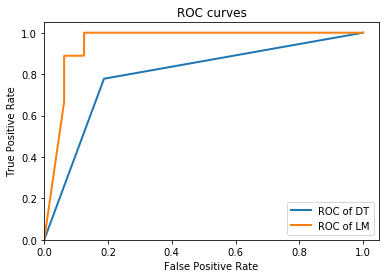

In [117]:
plot_roc_curve(dt_tpr, dt_fpr, "ROC of DT")
plot_roc_curve(lm_tpr, lm_fpr, "ROC of LM")


In [96]:
roc_curve?

Signature:
roc_curve(
    y_true,
    y_score,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC)

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------

y_true : array, shape = [n_samples]
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : array, shape = [n_samples]
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).

pos_label : int or str, default=None
    The label of the positive class.
    When ``pos_label=None``, if y_true is in {-1, 1} or {0, 1},
    ``pos_label`` is set to 1, otherwise an error will be raised.

sample_weight : array-like of shape (n_samples,), default=None
    Samp

In [97]:
Ytest

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1])

In [106]:
plt

NameError: name 'plt' is not defined